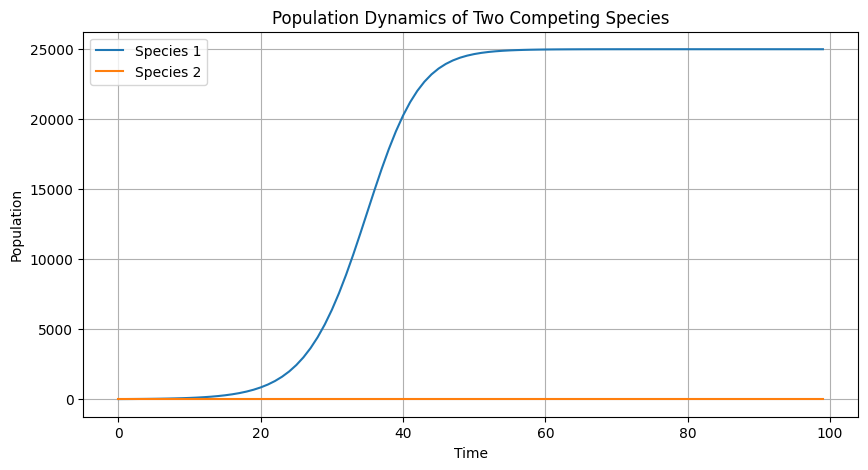

[1.00000000e+01 1.24990000e+01 1.56221877e+01 1.95252942e+01
 2.44028053e+01 3.04975517e+01 3.81126386e+01 4.76262725e+01
 5.95101580e+01 7.43522830e+01 9.28850711e+01 1.16020062e+02
 1.44890472e+02 1.80903157e+02 2.25801687e+02 2.81742244e+02
 3.51384019e+02 4.37995316e+02 5.45575746e+02 6.78993153e+02
 8.44131125e+02 1.04803833e+03 1.29906407e+03 1.60695442e+03
 1.98286999e+03 2.43926976e+03 2.98958683e+03 3.64760724e+03
 4.42645867e+03 5.33713797e+03 6.38657204e+03 7.57533203e+03
 8.89530849e+03 1.03278705e+04 1.18431890e+04 1.34013750e+04
 1.49557502e+04 1.64579431e+04 1.78637900e+04 1.91385876e+04
 2.02603791e+04 2.12206443e+04 2.20226479e+04 2.26783397e+04
 2.32048537e+04 2.36214148e+04 2.39470561e+04 2.41992052e+04
 2.43929912e+04 2.45410588e+04 2.46536878e+04 2.47390665e+04
 2.48036190e+04 2.48523286e+04 2.48890284e+04 2.49166482e+04
 2.49374166e+04 2.49530233e+04 2.49647454e+04 2.49735466e+04
 2.49801530e+04 2.49851108e+04 2.49888309e+04 2.49916219e+04
 2.49937157e+04 2.499528

In [118]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
b1 = 2.5 # Birth rate
b2 = 2.5 # Birth rate

d1 = 0 # Death rate
d2 = 0 # Death rate

k1 = 0.00001
k2 = 0.00001
  # Competition coefficient within species
c12 = 0
c21 = 0 # Competition coefficient between species

z_m1 =  0.5 #Mean discrimination term
z_m2 =  0.53 #Mean discrimination term

s1  = 0.1 #strengh of reproductive interference
s2 =  0.1 #strengh of reproductive interference

# Initial populations
initial_population_species_1 = 10
initial_population_species_2 = 0

# Time steps
number_of_generations = 100 # Total time
population_species_1 = np.zeros(number_of_generations)
population_species_2 = np.zeros(number_of_generations)
population_species_1[0] = initial_population_species_1
population_species_2[0] = initial_population_species_2

# Simulation
for t in range(number_of_generations-1):
    N1 = population_species_1[t]
    N2 = population_species_2[t]
    
    population_species_1[t+1] = b1 * (N1 / 2) * (N1 / (N1 + s1*(1 - z_m2) * N2)) - d1 * N1 - k1 * N1 * (N1 + c12 * N2)
    population_species_2[t+1] = b2 * (N2 / 2) * (N2 / (N2 + s2*(1 - z_m1) * N1)) - d2 * N2 - k2 * N2 * (N2 + c21 * N1)
    
    # Ensure populations don't go negative
    if population_species_1[t+1] < 0:
        population_species_1[t+1] = 0
    if population_species_2[t+1] < 0:
        population_species_2[t+1] = 0

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(population_species_1, label='Species 1')
plt.plot(population_species_2, label='Species 2')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Population Dynamics of Two Competing Species')
plt.legend()
plt.grid(True)
plt.show()

print(population_species_1)
print(population_species_2)

In [119]:
import numpy as np
import matplotlib.pyplot as plt

class Parameters:
    def __init__(self, b1, b2, d1, d2, k1, k2, c12, c21, z_m1_mean_initial, z_m2_mean_initial, initial_population_species_1, initial_population_species_2, number_of_generations):
        self.b1 = b1
        self.b2 = b2
        self.d1 = d1
        self.d2 = d2
        self.k1 = k1
        self.k2 = k2
        self.c12 = c12
        self.c21 = c21
        self.z_m1_mean_initial = z_m1_mean_initial
        self.z_m2_mean_initial = z_m2_mean_initial
        self.initial_population_species_1 = initial_population_species_1
        self.initial_population_species_2 = initial_population_species_2
        self.number_of_generations = number_of_generations

class Simulation:
    def __init__(self, params):
        self.params = params
        self.population_species_history_1 = np.zeros(params.number_of_generations)
        self.population_species_history_2 = np.zeros(params.number_of_generations)
        self.population_species_history_1[0] = params.initial_population_species_1
        self.population_species_history_2[0] = params.initial_population_species_2

    def next_generation(self, t):
        N1 = self.population_species_history_1[t]
        N2 = self.population_species_history_2[t]
        
        next_N1 = self.params.b1 * (N1 / 2) * (N1 / (N1 + (1 - self.params.z_m2) * N2)) - self.params.d1 * N1 - self.params.k1 * N1 * (N1 + self.params.c12 * N2)
        next_N2 = self.params.b2 * (N2 / 2) * (N2 / (N2 + (1 - self.params.z_m1) * N1)) - self.params.d2 * N2 - self.params.k2 * N2 * (N2 + self.params.c21 * N1)
        
        self.population_species_history_1[t + 1] = max(next_N1, 0)
        self.population_species_history_2[t + 1] = max(next_N2, 0)

    def run_simulation(self):
        for t in range(self.params.number_of_generations - 1):
            self.next_generation(t)
        return self.population_species_history_1, self.population_species_history_2

class Plotter:
    @staticmethod
    def plot_population_dynamics(population_species_1, population_species_2):
        plt.figure(figsize=(10, 5))
        plt.plot(population_species_1, label='Species 1')
        plt.plot(population_species_2, label='Species 2')
        plt.xlabel('Time')
        plt.ylabel('Population')
        plt.title('Population Dynamics of Two Competing Species')
        plt.legend()
        plt.grid(True)
        plt.show()

# Parameters
params = Parameters(
    b1 = 2.05, 
    b2 = 2.05, 
    d1 = 0, 
    d2 = 0, 
    k1 = 0.00001, 
    k2 = 0.00001, 
    c12 = 0, 
    c21 = 0, 
    z_m1 = 0.8, 
    z_m2 = 0.83, 
    initial_population_species_1 = 10, 
    initial_population_species_2 = 10, 
    number_of_generations = 100
)

# Simulation
sim = Simulation(params)
population_species_1, population_species_2 = sim.run_simulation()

# Plotting
Plotter.plot_population_dynamics(population_species_1, population_species_2)

print(population_species_1)
print(population_species_2)


TypeError: Parameters.__init__() got an unexpected keyword argument 'z_m1'

Final mean trait z_m1: 1.0063771992434811
Final mean trait z_m2: 0.7531885996217407


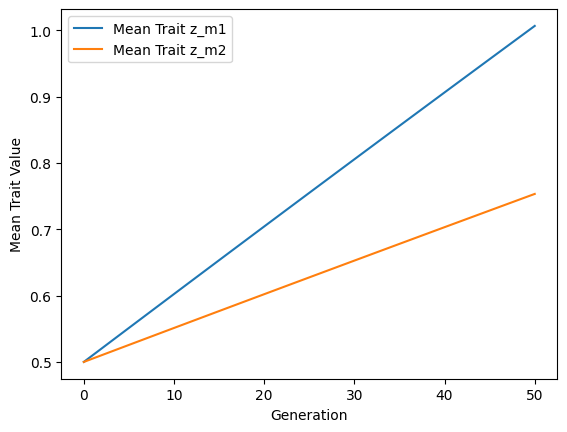

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants and initial values
a = 0.1
V_A1 = 0.2
V_A2 = 0.1
F1 = 0.5
F2 = 0.5

# Initial mean traits
z_m1 = 0.5
z_m2 = 0.5

# Fitness functions
def W_m1(z_m1, F1, F2, a):
    return 1 - a * (1 - z_m1) * (F2 / (F2 + F1))

def W_m2(z_m1, F1, F2, a):
    return 1 - a * (1 - z_m1) * (F2 / (F2 + F1))

# Simulation parameters
num_generations = 50

# historys to store the evolution of traits
z_m1_history = [z_m1]
z_m2_history = [z_m2]

# Simulation loop
for _ in range(num_generations):
    W_m1_value = W_m1(z_m1, F1, F2, a)
    W_m2_value = W_m2(z_m1, F1, F2, a)
    
    # Calculate gradients
    dW_m1_dz_m2 = a * (F2 / (F2 + F1))
    dW_m2_dz_m2 = a * (F1 / (F1 + F2))
    
    # Update traits
    delta_z_m1 = V_A1 * (1 / W_m2_value) * dW_m1_dz_m2
    delta_z_m2 = V_A2 * (1 / W_m2_value) * dW_m2_dz_m2
    
    z_m1 += delta_z_m1
    z_m2 += delta_z_m2
    
    # Store the updated traits
    z_m1_history.append(z_m1)
    z_m2_history.append(z_m2)

# Results
print("Final mean trait z_m1:", z_m1)
print("Final mean trait z_m2:", z_m2)

# Plotting the evolution of traits
plt.plot(z_m1_history, label="Mean Trait z_m1")
plt.plot(z_m2_history, label="Mean Trait z_m2")
plt.xlabel("Generation")
plt.ylabel("Mean Trait Value")
plt.legend()
plt.show()


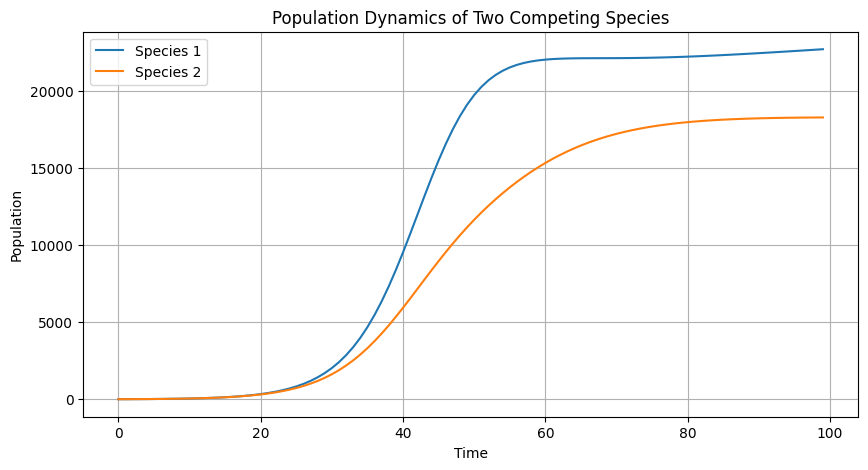

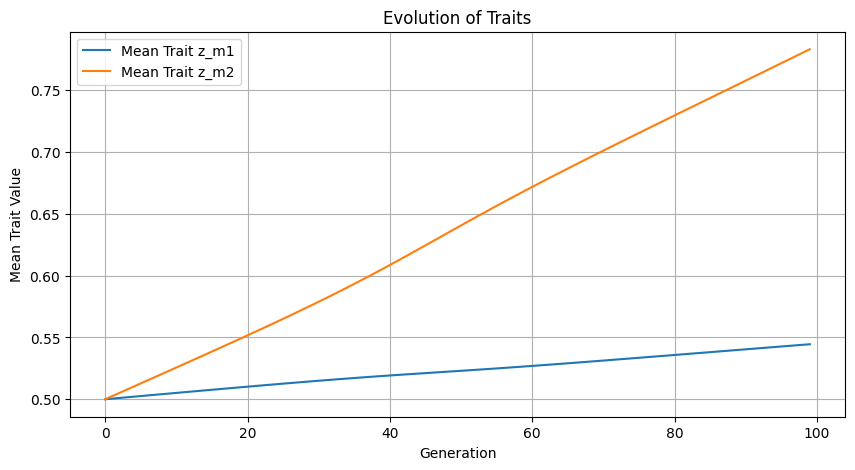

Final mean trait z_m1: 0.5444901307472854
Final mean trait z_m2: 0.783182078360575


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class Parameters:
    def __init__(self, b1, b2, k1, k2, c12, c21, z_m1_mean_initial, z_m2_mean_initial, initial_population_species_1, initial_population_species_2, cost_to_males, strength_of_interference, V_A1, V_A2, num_generations):
        self.b1 = b1
        self.b2 = b2
        self.k1 = k1
        self.k2 = k2
        self.c12 = c12
        self.c21 = c21
        self.z_m1_mean_initial = z_m1_mean_initial
        self.z_m2_mean_initial = z_m2_mean_initial
        self.initial_population_species_1 = initial_population_species_1
        self.initial_population_species_2 = initial_population_species_2
        self.cost_to_males = cost_to_males
        self.strength_of_interference = strength_of_interference
        self.V_A1 = V_A1
        self.V_A2 = V_A2
        self.num_generations = num_generations

class Simulation:
    def __init__(self, params):
        self.params = params
        self.population_species_history_1 = np.zeros(params.num_generations)
        self.population_species_history_2 = np.zeros(params.num_generations)
        self.population_species_history_1[0] = params.initial_population_species_1
        self.population_species_history_2[0] = params.initial_population_species_2
        self.z_m1_history = [params.z_m1]
        self.z_m2_history = [params.z_m2]
        self.z_m1_mean_initial = params.z_m1_mean_initial
        self.z_m2_mean_initial = params.z_m2_mean_initial

    def next_generation_ecology(self, t, z_m1, z_m2):
        N1 = self.population_species_history_1[t]
        N2 = self.population_species_history_2[t]
        
        next_N1 = self.params.b1 * (N1 / 2) * (N1 / (N1 + self.params.strength_of_interference*(1 - z_m1) * N2)) - self.params.k1 * N1 * (N1 + self.params.c12 * N2)
        next_N2 = self.params.b2 * (N2 / 2) * (N2 / (N2 + self.params.strength_of_interference*(1 - z_m2) * N1)) - self.params.k2 * N2 * (N2 + self.params.c21 * N1)
        
        self.population_species_history_1[t + 1] = max(next_N1, 0)
        self.population_species_history_2[t + 1] = max(next_N2, 0)

    def next_generation_traits(self, N1, N2, z_m1, z_m2):
        W_m1 = 1 - (self.params.cost_to_males * (1 - self.z_m1) * (N2 / (N2 + N1)))
        W_m2 = 1 - (self.params.cost_to_males * (1 - self.z_m1) * (N2 / (N2 + N1)))
        
        dW_m1_dz_m2 = self.params.cost_to_males * (N2 / (N2 + N1))
        dW_m2_dz_m2 = self.params.cost_to_males * (N1 / (N1 + N2))
        
        delta_z_m1 = self.params.V_A1 * (1 / W_m1) * dW_m1_dz_m2
        delta_z_m2 = self.params.V_A2 * (1 / W_m2) * dW_m2_dz_m2
        
        new_z_m1 = self.z_m1 + delta_z_m1
        new_z_m2 = self.z_m2 + delta_z_m2
        
        if new_z_m1 <= 1:
            self.z_m1 = new_z_m1
        if new_z_m2 <= 1:
            self.z_m2 = new_z_m2
        
        self.z_m1_history.append(self.z_m1)
        self.z_m2_history.append(self.z_m2)

    def next_generation(self, t):
        self.next_generation_ecology(t)
        N1 = self.population_species_history_1[t]
        N2 = self.population_species_history_2[t]
        self.next_generation_traits(N1, N2)
        return N1, N2

    def run_simulation(self):
        for t in range(self.params.num_generations - 1):
            N1, N2 = self.next_generation(t)
            if N1 == 0:
                print(f"At generation {t+1} N1 went extinct")
                break
            if N2 == 0:
                print(f"At generation {t+1} N2 went extinct")
                break
        return self.population_species_history_1, self.population_species_history_2, self.z_m1_history, self.z_m2_history

class Plotter:
    @staticmethod
    def plot_population_dynamics(population_species_1, population_species_2):
        plt.ion()  # Turn on interactive mode
        fig, ax = plt.subplots(figsize=(10, 5))
        ax.plot(population_species_1, label='Species 1')
        ax.plot(population_species_2, label='Species 2')
        ax.set_xlabel('Time')
        ax.set_ylabel('Population')
        ax.set_title('Population Dynamics of Two Competing Species')
        ax.legend()
        ax.grid(True)
        plt.show()

    @staticmethod
    def plot_traits_evolution(z_m1_history, z_m2_history):
        plt.ion()  # Turn on interactive mode
        fig, ax = plt.subplots(figsize=(10, 5))
        ax.plot(z_m1_history, label="Mean Trait z_m1")
        ax.plot(z_m2_history, label="Mean Trait z_m2")
        ax.set_xlabel("Generation")
        ax.set_ylabel("Mean Trait Value")
        ax.set_title('Evolution of Traits')
        ax.legend()
        ax.grid(True)
        plt.show()
# Parameters
params = Parameters(
    b1 = 2.5, 
    b2 = 2.5, 
    k1 = 0.00001, 
    k2 = 0.00001, 
    c12 = 0, 
    c21 = 0, 
    z_m1 = 0.5, 
    z_m2 = 0.5, 
    initial_population_species_1 = 10, 
    initial_population_species_2 = 10, 
    cost_to_males = 0.1,
    strength_of_interference = 0.1,
    V_A1 = 0.01,
    V_A2 = 0.05,
    num_generations = 100
)

# Simulation
sim = Simulation(params)
population_species_1, population_species_2, z_m1_history, z_m2_history = sim.run_simulation()

# Plotting
Plotter.plot_population_dynamics(population_species_1, population_species_2)
Plotter.plot_traits_evolution(z_m1_history, z_m2_history)

print("Final mean trait z_m1:", sim.z_m1)
print("Final mean trait z_m2:", sim.z_m2)


June 24


At generation 0, Species 1 went extinct.


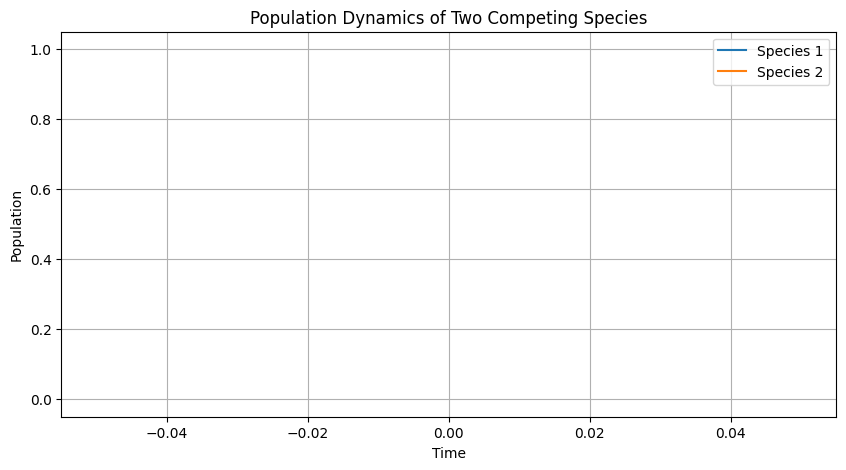

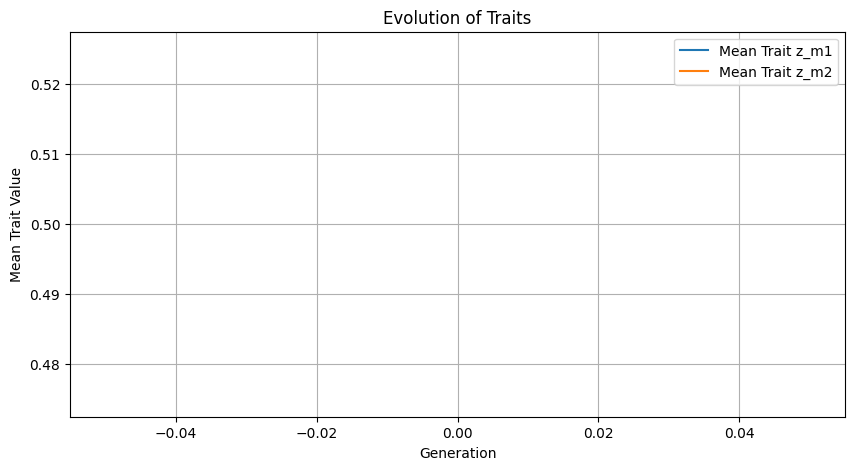

Final mean trait z_m1: 0.5
Final mean trait z_m2: 0.5


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class Parameters:
    def __init__(self, b1, b2, k1, k2, c12, c21, z_m1_initial, z_m2_initial, initial_population_species_1, initial_population_species_2, cost_to_males, strength_of_interference, V_A1, V_A2, num_generations):
        self.b1 = b1
        self.b2 = b2
        self.k1 = k1
        self.k2 = k2
        self.c12 = c12
        self.c21 = c21
        self.z_m1_initial = z_m1_initial
        self.z_m2_initial = z_m2_initial
        self.initial_population_species_1 = initial_population_species_1
        self.initial_population_species_2 = initial_population_species_2
        self.cost_to_males = cost_to_males
        self.strength_of_interference = strength_of_interference
        self.V_A1 = V_A1
        self.V_A2 = V_A2
        self.num_generations = num_generations

class Simulation:
    def __init__(self, params):
        self.params = params
        self.population_species_history_1 = np.zeros(params.num_generations)
        self.population_species_history_2 = np.zeros(params.num_generations)
        self.population_species_history_1[0] = params.initial_population_species_1
        self.population_species_history_2[0] = params.initial_population_species_2
        self.z_m1_history = [params.z_m1_initial]
        self.z_m2_history = [params.z_m2_initial]
        self.z_m1 = params.z_m1_initial
        self.z_m2 = params.z_m2_initial

    def next_generation_ecology(self, t):
        N1 = self.population_species_history_1[t]
        N2 = self.population_species_history_2[t]

        if N1 > 0 and N2 > 0:
        
            next_N1 = self.params.b1 * (N1 / 2) * (N1 / (N1 + self.params.strength_of_interference * (1 - self.z_m2) * N2)) - self.params.k1 * N1 * (N1 + self.params.c12 * N2)
            next_N2 = self.params.b2 * (N2 / 2) * (N2 / (N2 + self.params.strength_of_interference * (1 - self.z_m1) * N1)) - self.params.k2 * N2 * (N2 + self.params.c21 * N1)

            self.population_species_history_1[t + 1] = max(next_N1, 0)
            self.population_species_history_2[t + 1] = max(next_N2, 0)

    def next_generation_traits(self, N1, N2):

        if N1 > 0 and N2 > 0:

            W_m1 = 1 - (self.params.cost_to_males * (1 - self.z_m1) * (N2 / (N2 + N1)))
            W_m2 = 1 - (self.params.cost_to_males * (1 - self.z_m2) * (N2 / (N2 + N1)))
            
            dW_m1_dz_m2 = self.params.cost_to_males * (N2 / (N2 + N1))
            dW_m2_dz_m2 = self.params.cost_to_males * (N1 / (N1 + N2))
            
            delta_z_m1 = self.params.V_A1 * (1 / W_m1) * dW_m1_dz_m2
            delta_z_m2 = self.params.V_A2 * (1 / W_m2) * dW_m2_dz_m2
            
            new_z_m1 = self.z_m1 + delta_z_m1
            new_z_m2 = self.z_m2 + delta_z_m2
            
            if new_z_m1 <= 1:
                self.z_m1 = new_z_m1
            if new_z_m2 <= 1:
                self.z_m2 = new_z_m2
            
            self.z_m1_history.append(self.z_m1)
            self.z_m2_history.append(self.z_m2)

    def next_generation(self, t):
        self.next_generation_ecology(t)
        N1 = self.population_species_history_1[t + 1]  # Updated populations for the next generation
        N2 = self.population_species_history_2[t + 1]
        self.next_generation_traits(N1, N2)
        return N1, N2

    def run_simulation(self):
        for t in range(self.params.num_generations - 1):
            N1, N2 = self.next_generation(t)

            if N1 == 0:
                print(f"At generation {t}, Species 1 went extinct.")
                break
            if N2 == 0:
                print(f"At generation {t}, Species 2 went extinct.")
                break
        return self.population_species_history_1[0:t+1], self.population_species_history_2[0:t+1], self.z_m1_history, self.z_m2_history

class Plotter:
    @staticmethod
    def plot_population_dynamics(population_species_1, population_species_2):
        plt.ion()  # Turn on interactive mode
        fig, ax = plt.subplots(figsize=(10, 5))
        ax.plot(population_species_1, label='Species 1')
        ax.plot(population_species_2, label='Species 2')
        ax.set_xlabel('Time')
        ax.set_ylabel('Population')
        ax.set_title('Population Dynamics of Two Competing Species')
        ax.legend()
        ax.grid(True)
        plt.show()

    @staticmethod
    def plot_traits_evolution(z_m1_history, z_m2_history):
        plt.ion()  # Turn on interactive mode
        fig, ax = plt.subplots(figsize=(10, 5))
        ax.plot(z_m1_history, label="Mean Trait z_m1")
        ax.plot(z_m2_history, label="Mean Trait z_m2")
        ax.set_xlabel("Generation")
        ax.set_ylabel("Mean Trait Value")
        ax.set_title('Evolution of Traits')
        ax.legend()
        ax.grid(True)
        plt.show()

# Parameters
params = Parameters(
    b1 = 2.5, 
    b2 = 2.5, 
    k1 = 0.00000, 
    k2 = 0.00000, 
    c12 = 0, 
    c21 = 0, 
    z_m1_initial = 0.5, 
    z_m2_initial = 0.5, 
    initial_population_species_1 = 1, 
    initial_population_species_2 = 0, 
    cost_to_males = 0.1,
    strength_of_interference = 0.1,
    V_A1 = 0, 
    V_A2 = 0, 
    num_generations =10
)

# Simulation
sim = Simulation(params)
population_species_1, population_species_2, z_m1_history, z_m2_history = sim.run_simulation()

# Plotting
Plotter.plot_population_dynamics(population_species_1, population_species_2)
Plotter.plot_traits_evolution(z_m1_history, z_m2_history)

print("Final mean trait z_m1:", sim.z_m1)
print("Final mean trait z_m2:", sim.z_m2)


june 14 2

Algorithm:






At generation 59, one of the species went extinct.


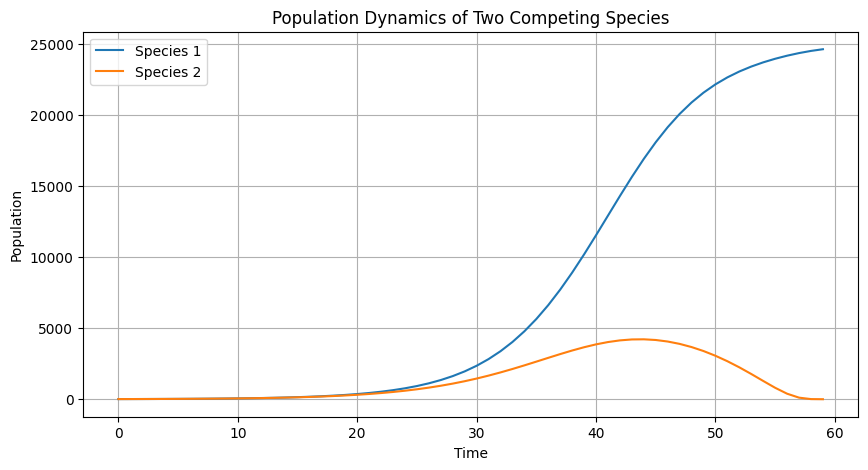

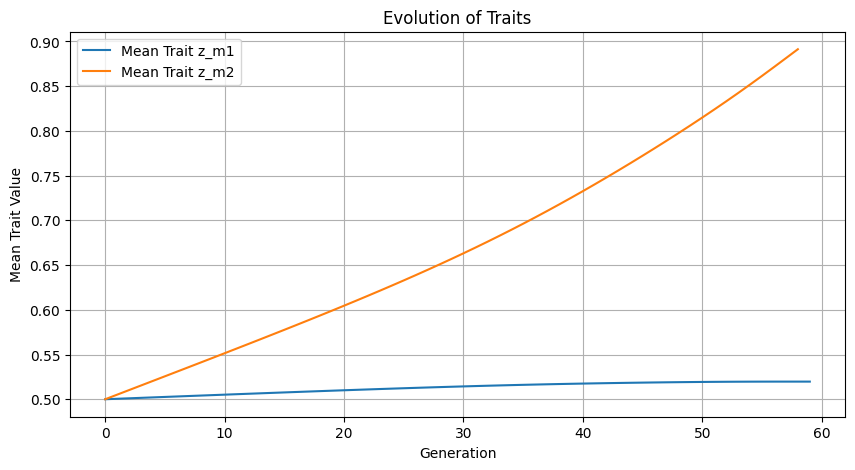

Final mean trait z_m1: 0.5196918651658218
Final mean trait z_m2: 0.8913505132935949


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class Parameters:   #class for defining parameters

    '''
Parameters defined as one class

A paramter instance is created for a specific paramter combination which is used by the simulation function'''



    def __init__(self, b1, b2, k1, k2, c12, c21, z_m1_initial, z_m2_initial, initial_population_species_1, initial_population_species_2, cost_to_males, strength_of_interference, V_A1, V_A2, num_generations):
        self.b1 = b1    #growth rate of sp. 1
        self.b2 = b2    #growth rate of sp. 2
        self.k1 = k1    #density dependent mortality of sp. 1
        self.k2 = k2    #density dependent mortality of sp. 2
        self.c12 = c12  #competetive effect of sp. 2 on sp. 1
        self.c21 = c21  #competetive effect of sp. 1 on sp. 2
        self.z_m1_initial = z_m1_initial  #initial mean discrimination of males of sp.1
        self.z_m2_initial = z_m2_initial  #initial mean discriminatiin of males of sp. 2
        self.initial_population_species_1 = initial_population_species_1  
        self.initial_population_species_2 = initial_population_species_2
        self.cost_to_males = cost_to_males   #cost of wrong matings for male fitness
        self.strength_of_interference = strength_of_interference  #how heterospecific matings affect fitness
        self.V_A1 = V_A1  #evolvabilty i.e. additive genetic variance of sp.1
        self.V_A2 = V_A2  #evolvabilty i.e. additive genetic variance of sp.2
        self.num_generations = num_generations  

class Simulation:

    '''Simulation defined as the other class which takes the parameter instance as an argument and runs the simulation. '''


    '''initial population of the species and initual trait values are recorded. Lists are created, which will store the population and trait values for each generation.'''
    def __init__(self, params):
        self.params = params
        self.population_species_history_1 = [params.initial_population_species_1]
        self.population_species_history_2 = [params.initial_population_species_2]
        self.z_m1_history = [params.z_m1_initial]
        self.z_m2_history = [params.z_m2_initial]
        self.z_m1 = params.z_m1_initial
        self.z_m2 = params.z_m2_initial


    def next_generation_ecology(self):
        '''function to calculate next generatioin pop numbers for both species using current population numbers and trait values. The new population numbers are calculated using the ecological equations given in the paper. The new population numbers are appended to the population history list.'''

    

        '''N1 and N2 are taken as the population of the species at the current generation.  (thus, last entry of the population history list)'''
        N1 = self.population_species_history_1[-1]
        N2 = self.population_species_history_2[-1]

        
        if N1 > 0:  #only if N1 > 0 is there a chance of there being population change. else the population continues to be 0
            next_N1 = self.params.b1 * (N1 / 2) * (N1 / (N1 + self.params.strength_of_interference * (1 - self.z_m2) * N2)) - self.params.k1 * N1 * (N1 + self.params.c12 * N2)
            next_N1 = max(next_N1, 0)   #to ensure that next_N1 is not negative 
        else:
            next_N1 = 0 
        
        if N2 > 0:
            next_N2 = self.params.b2 * (N2 / 2) * (N2 / (N2 + self.params.strength_of_interference * (1 - self.z_m1) * N1)) - self.params.k2 * N2 * (N2 + self.params.c21 * N1)
            next_N2 = max(next_N2, 0)   #to ensure that next_N2 is not negative
        else:
            next_N2 = 0

        self.population_species_history_1.append(next_N1)   #append next generation population numbers to the population history list
        self.population_species_history_2.append(next_N2)

    def next_generation_traits(self, N1, N2):
        if N1 > 0:  #only if both species have non zero population numbers, there is evolution of trait values. Else the trait values remain the same as the previous generation.
            W_m1 = 1 - (self.params.cost_to_males * (1 - self.z_m1) * (N2 / (N2 + N1)))   # ''Fitness'' of trait z_m1. fitness cost to mating, times proportion of incorrect matings
            
            dW_m1_dz_m2 = self.params.cost_to_males * (N2 / (N2 + N1)) #dw_m1/dz_m2 is the derivative of fitness with respect to the trait value of the species.
            
            delta_z_m1 = self.params.V_A1 * (1 / W_m1) * dW_m1_dz_m2  #change in trait value of species 1. Additive genetic variance x 1/W x w
            new_z_m1 = self.z_m1 + delta_z_m1
            
            if new_z_m1 <= 1:
                self.z_m1 = new_z_m1

            self.z_m1_history.append(self.z_m1)

        if N2 > 0: 

            W_m2 = 1 - (self.params.cost_to_males * (1 - self.z_m2) * (N2 / (N2 + N1)))
            dW_m2_dz_m2 = self.params.cost_to_males * (N1 / (N1 + N2))
            delta_z_m2 = self.params.V_A2 * (1 / W_m2) * dW_m2_dz_m2
            new_z_m2 = self.z_m2 + delta_z_m2
            if new_z_m2 <= 1:
                self.z_m2 = new_z_m2

            self.z_m2_history.append(self.z_m2)

    def next_generation(self):
        '''next generation ecology (population numbers) and evolution (trait updation). There is seperation of time scales'''
        self.next_generation_ecology()   #calculate and update the population numbers for the next 
        
        '''Evolution - trait updation'''
        N1 = self.population_species_history_1[-1]  #from the list take the last entry which is the population number for the next generation
        N2 = self.population_species_history_2[-1]   
        self.next_generation_traits(N1, N2)  #using the new population numbers can 
        return N1, N2

    def run_simulation(self):   
        for t in range(self.params.num_generations - 1):
            N1, N2 = self.next_generation()    #run the next generation function for each generation
            if N1 == 0 or N2 == 0:    #if either of the species goes extinct, the simulation stops
                print(f"At generation {t + 1}, one of the species went extinct.")
                break
        return self.population_species_history_1, self.population_species_history_2, self.z_m1_history, self.z_m2_history

class Plotter:
    @staticmethod
    def plot_population_dynamics(population_species_1, population_species_2):
        plt.ion()  # Turn on interactive mode
        fig, ax = plt.subplots(figsize=(10, 5))
        ax.plot(population_species_1, label='Species 1')
        ax.plot(population_species_2, label='Species 2')
        ax.set_xlabel('Time')
        ax.set_ylabel('Population')
        ax.set_title('Population Dynamics of Two Competing Species')
        ax.legend()
        ax.grid(True)
        plt.show()

    @staticmethod
    def plot_traits_evolution(z_m1_history, z_m2_history):
        plt.ion()  # Turn on interactive mode
        fig, ax = plt.subplots(figsize=(10, 5))
        ax.plot(z_m1_history, label="Mean Trait z_m1")
        ax.plot(z_m2_history, label="Mean Trait z_m2")
        ax.set_xlabel("Generation")
        ax.set_ylabel("Mean Trait Value")
        ax.set_title('Evolution of Traits')
        ax.legend()
        ax.grid(True)
        plt.show()

# Parameters
params = Parameters(
    b1 = 2.5, 
    b2 = 2.5, 
    k1 = 0.00001, 
    k2 = 0.00001, 
    c12 = 0.1, 
    c21 = 0.1, 
    z_m1_initial = 0.5, 
    z_m2_initial = 0.5, 
    initial_population_species_1 = 10, 
    initial_population_species_2 = 10, 
    cost_to_males = 0.1,
    strength_of_interference = 0.1,
    V_A1 = 0.01, 
    V_A2 = 0.1, 
    num_generations = 1000
)

# Simulation
sim = Simulation(params)
population_species_1, population_species_2, z_m1_history, z_m2_history = sim.run_simulation()

# Plotting
Plotter.plot_population_dynamics(population_species_1, population_species_2)
Plotter.plot_traits_evolution(z_m1_history, z_m2_history)

print("Final mean trait z_m1:", sim.z_m1)
print("Final mean trait z_m2:", sim.z_m2)
